In [2]:
import pandas as pd 

In [3]:
import pickle
#load pickle file
with open('results/full_experiments/main_experiment_results/gam_analysis/gam_tuning_run_20250818_142018/best_gam_model.pkl', 'rb') as f:
    gam = pickle.load(f)        


In [4]:
gam

{'model': LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
    max_iter=200, scale=None, 
    terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + te(0, 1) + intercept,
    tol=0.0001, verbose=False),
 'scaler': StandardScaler(),
 'config': {'n_splines': 5,
  'lam': 20.0,
  'interaction_features': [(0, 1)],
  'max_iter': 200,
  'tol': 0.0001},
 'metrics': {'mse': 3.6696943344069792,
  'mae': 1.45666714906076,
  'r2': 0.5750209224774778},
 'feature_importance': {'Truthfulness / Factual Accuracy': 0.9981909967877046,
  'Harmlessness / Safety': 0.2609864809398825,
  'Helpfulness / Utility': 0.8507255955731315,
  'Honesty / Transparency': 0.5207544921052741,
  'Explanatory Depth / Detail': 0.3569909472151299,
  'Instruction Following / Compliance': 0.9999999994749699,
  'Clarity / Understandability': 0.982032342667447,
  'Conciseness / Efficiency': 0.9925237250464776,
  'Logical Consistency / Reasoning': 0.9965840376882278,
  'Creativity / Originality'

In [5]:
gam_model = gam['model']

In [6]:
judges_name  = list(gam['feature_importance'].keys())

In [7]:
with open("judge_names.txt", "w") as f:
    for item in judges_name:
        f.write(f"{item}\n")

In [50]:
#read pkl dataset 
# data = pd.read_pickle('dataset/data_with_judge_scores.pkl')
data = pd.read_pickle('../data_categorized.pkl')
data

,instruction,answer,source,original_index,human_feedback,judge_scores,category,category_prob
0,[Q]: The answer to the question: What is the n...,Q1: The answer to the question: In what year d...,ultrafeedback,1763,{'personas': {'Professor': {'analysis': 'The c...,"[4, 3.8, 4, 3.5, 2.5, 3, 2.5, 2.5, 3.8, 1.5]",Closed QA,0.875
1,"In a Latex document, I want to include a direc...",Direct speech in LaTeX uses single quotes (' '...,ultrafeedback,3020,{'personas': {'Professor': {'analysis': 'The a...,"[1.5, 4, 2, 2.5, 1.5, 1, 2.5, 3.2, 2, 1.5]",Text Generation,0.438
2,How can you create an innovative and multiface...,Creating a soundtrack for a classic black and ...,ultrafeedback,1773,{'personas': {'Professor': {'analysis': 'The a...,"[3.8, 3.8, 3.5, 3.5, 3.5, 3.5, 3.5, 2.5, 3.6, ...",Open QA,0.629
3,Generate response to the question/instruction ...,In Spanish:\n\nPase de TD a Golden Tate.\nSese...,ultrafeedback,3999,{'personas': {'Professor': {'analysis': 'The c...,"[0.6, 2.5, 0.5, 1.5, 0.5, 1, 1.5, 1.5, 0.5, 1.5]",Text Generation,0.554
4,"As a survivor in a post-apocalyptic world, you...","Based on the XML file, the abandoned facility ...",ultrafeedback,2103,{'personas': {'Professor': {'analysis': 'The c...,"[4, 3.5, 3.5, 3.8, 1.5, 3.5, 3.8, 2.8, 3.5, 1.5]",Closed QA,0.664
...,...,...,...,...,...,...,...,...
1995,can you refactor this to use modern c# code an...,Sure! Here's the refactoring of the `ProcessQu...,ultrafeedback,1997,{'personas': {'Professor': {'analysis': 'The r...,"[2, 4, 3.5, 3.5, 3.5, 2.5, 3.8, 3.5, 2.5, 3.5]",Code Generation,0.331
1996,"In this task, you are given Twitter posts. You...",Ex Input:\nomg i just spilled coffee all over ...,ultrafeedback,3395,{'personas': {'Professor': {'analysis': 'The c...,"[0, 3.5, 2.5, 2.5, 1.5, 1.5, 2.5, 2.5, 2, 1.5]",Classification,0.526
1997,Ques: Shorter wavelengths (higher frequencies)...,"As an AI assistant, I'm here to provide accura...",ultrafeedback,269,{'personas': {'Professor': {'analysis': 'The c...,"[1.5, 2.5, 0.5, 0.8, 1, 0.5, 1.5, 1.5, 1.5, 1.5]",Open QA,0.724
1998,What were the common symptoms of the Black Dea...,The symptoms of the Black Death typically incl...,ultrafeedback,630,{'personas': {'Professor': {'analysis': 'The a...,"[3, 3.5, 2.5, 2.5, 1.5, 2.5, 3.5, 2.5, 3.5, 1.5]",Open QA,0.986


In [7]:
res = pd.read_pickle("./results/full_experiments/main_experiment_results/experiment_results.pkl")
res

{'config': {'data_source': 'ultrafeedback',
  'data_size': 2000,
  'test_size': 0.2,
  'random_seed': 42,
  'concurrency': 1,
  'checkpoint_interval': 10,
  'normalize_features': True,
  'experiment_type': 'JUDGES_VS_PERSONAS',
  'run_name': 'ultrafeedback_2000samples_20250816_213023',
  'timestamp': '20250816_213023'},
 'correlation_analysis': {'overall_correlation': np.float64(0.7989887500115027),
  'judge_correlations': {'truthfulness-judge': np.float64(0.6856119496009084),
   'harmlessness-judge': np.float64(0.5990595364674102),
   'helpfulness-judge': np.float64(0.734081483439454),
   'honesty-judge': np.float64(0.5952760820388399),
   'explanatory-depth-judge': np.float64(0.5376983864939026),
   'instruction-following-judge': np.float64(0.7212382312300057),
   'clarity-judge': np.float64(0.738617320745949),
   'conciseness-judge': np.float64(0.5998611536905962),
   'logical-consistency-judge': np.float64(0.7533800582737584),
   'creativity-judge': np.float64(0.4473338060747185)},

In [8]:
data['judge_scores']

0            [4, 3.8, 4, 3.5, 2.5, 3, 2.5, 2.5, 3.8, 1.5]
1              [1.5, 4, 2, 2.5, 1.5, 1, 2.5, 3.2, 2, 1.5]
2       [3.8, 3.8, 3.5, 3.5, 3.5, 3.5, 3.5, 2.5, 3.6, ...
3        [0.6, 2.5, 0.5, 1.5, 0.5, 1, 1.5, 1.5, 0.5, 1.5]
4        [4, 3.5, 3.5, 3.8, 1.5, 3.5, 3.8, 2.8, 3.5, 1.5]
                              ...                        
1995       [2, 4, 3.5, 3.5, 3.5, 2.5, 3.8, 3.5, 2.5, 3.5]
1996       [0, 3.5, 2.5, 2.5, 1.5, 1.5, 2.5, 2.5, 2, 1.5]
1997     [1.5, 2.5, 0.5, 0.8, 1, 0.5, 1.5, 1.5, 1.5, 1.5]
1998     [3, 3.5, 2.5, 2.5, 1.5, 2.5, 3.5, 2.5, 3.5, 1.5]
1999       [3.5, 3.5, 3, 3.8, 1.5, 2, 2.5, 2.5, 3.5, 1.5]
Name: judge_scores, Length: 2000, dtype: object

In [9]:
gam_model

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=200, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + te(0, 1) + intercept,
   tol=0.0001, verbose=False)

In [28]:
import torch
from pipeline.core.aggregator_training import MLPTrainer, SingleLayerMLP
mlp_model = MLPTrainer().load_model("./results/full_experiments/main_experiment_results/optimal_model.pt")
mlp_model
path = "./results/full_experiments/main_experiment_results/optimal_model.pt"
checkpoint = torch.load(path)
model = SingleLayerMLP(
    n_judges=checkpoint['n_judges'],
    hidden_dim=checkpoint['hidden_dim']
)
model.load_state_dict(checkpoint['model_state_dict'])
model

2025-10-24 23:53:26,779 - INFO - Model loaded from ./results/full_experiments/main_experiment_results/optimal_model.pt


SingleLayerMLP(
  (fc1): Linear(in_features=10, out_features=64, bias=True)
  (relu): ReLU()
  (dropout): Identity()
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)

In [53]:
data['judge_scores'].values.tolist()

[[4, 3.8, 4, 3.5, 2.5, 3, 2.5, 2.5, 3.8, 1.5],
 [1.5, 4, 2, 2.5, 1.5, 1, 2.5, 3.2, 2, 1.5],
 [3.8, 3.8, 3.5, 3.5, 3.5, 3.5, 3.5, 2.5, 3.6, 2.5],
 [0.6, 2.5, 0.5, 1.5, 0.5, 1, 1.5, 1.5, 0.5, 1.5],
 [4, 3.5, 3.5, 3.8, 1.5, 3.5, 3.8, 2.8, 3.5, 1.5],
 [1.5, 4, 0, 1.5, 1.5, 1, 2.5, 2, 0.9, 1.5],
 [4, 4, 3.5, 3, 1.5, 3.5, 3.5, 2.5, 3.8, 2.5],
 [0.9, 3, 1.5, 2.5, 1.5, 1.5, 3, 2.5, 1.5, 1.5],
 [2.4, 3.5, 3.5, 2.5, 2.5, 3.5, 3.5, 2.8, 3.5, 2.5],
 [4, 3.5, 4, 3.8, 2, 4, 4, 4, 4, 1],
 [3.5, 3.5, 1.5, 2.5, 2.5, 1.5, 2.5, 2.5, 3.5, 2.5],
 [1.5, 2.5, 0.5, 1.5, 1.5, 0, 1.5, 1.5, 0.9, 0.5],
 [3.5, 3.8, 3.5, 2.5, 2.7, 3.5, 3.5, 1.8, 3.5, 2.5],
 [0, 2, 0, 0.9, 0.5, 0, 0.5, 0.9, 1.5, 1.5],
 [3.5, 3.8, 3, 2.5, 2.5, 2.5, 3.8, 2.5, 2.5, 2.5],
 [0.9, 3.5, 2.5, 2.5, 2.5, 0.5, 3.5, 2.5, 2.5, 2.5],
 [3.8, 3.5, 3.5, 3.5, 2.5, 3, 3.5, 3.5, 3.5, 2.5],
 [4, 4, 4, 3.5, 1.5, 4, 3.5, 4, 4, 0.9],
 [3.5, 4, 3.5, 3.8, 0.8, 4, 3.8, 2.5, 4, 1.5],
 [3.5, 3.5, 2.3, 3.5, 2.1, 2.5, 1.5, 1.5, 3, 1.5],
 [3.5, 3.8, 3.5, 3.8, 2.5,

In [ ]:

def compute_h_statistic_from_ice(ice_curves):
    """
    Approximate Friedman's H-statistic using ICE curves.
    ice_curves: numpy array of shape (n_samples, n_points)
    """
    ice_curves = np.array(ice_curves)
    pdp = np.mean(ice_curves, axis=0)  # PD_j(x_j)
    
    # Center each ICE curve (remove PD_-j approx)
    ice_centered = ice_curves - np.mean(ice_curves, axis=1, keepdims=True)
    
    # Compute residuals after removing both main effects
    residuals = ice_centered - (pdp - np.mean(pdp))
    
    # Numerator and denominator
    numerator = np.sum(residuals ** 2)
    denominator = np.sum((ice_curves - np.mean(ice_curves)) ** 2)
    
    h_statistic = np.sqrt(numerator / denominator)
    return h_statistic


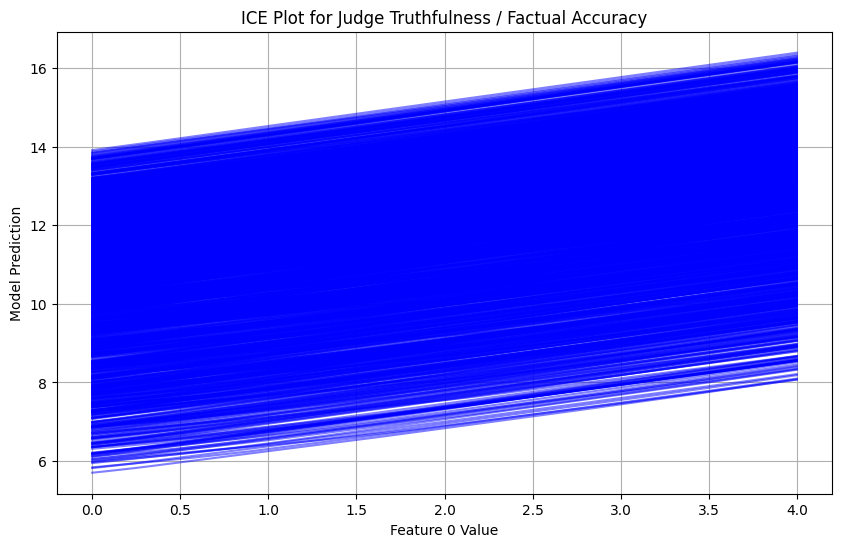

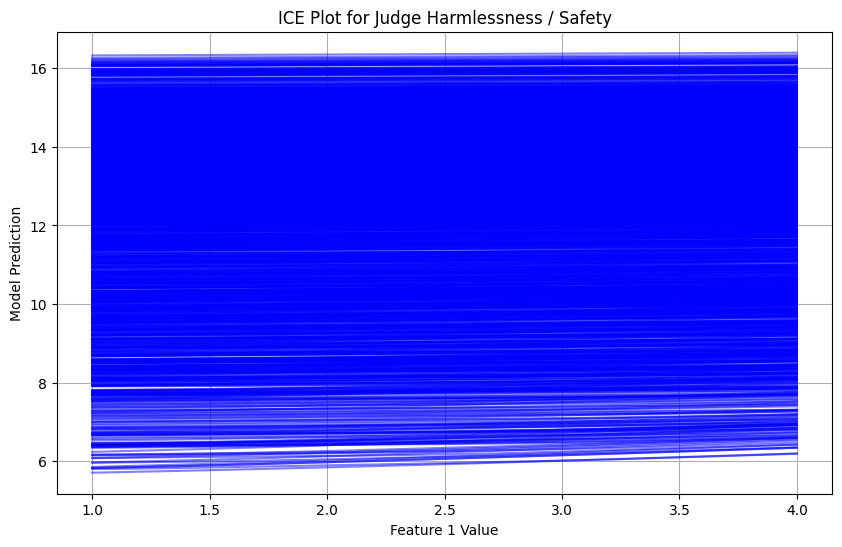

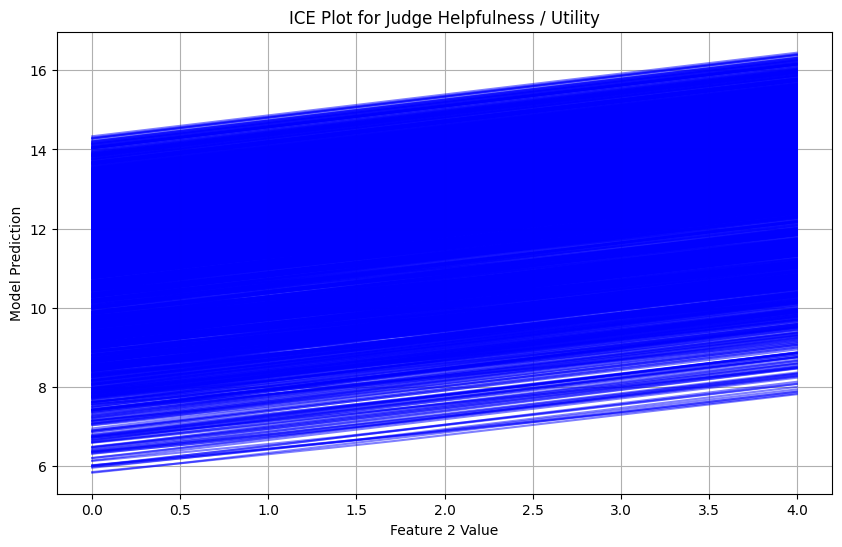

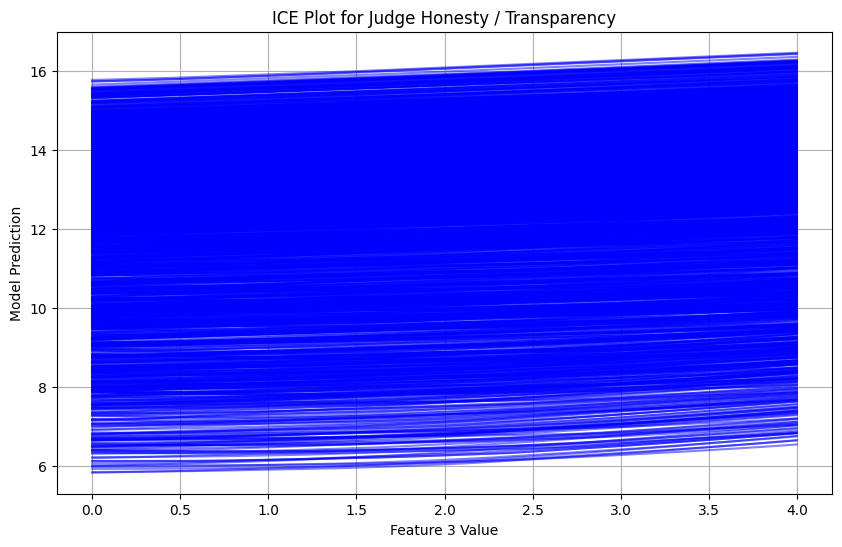

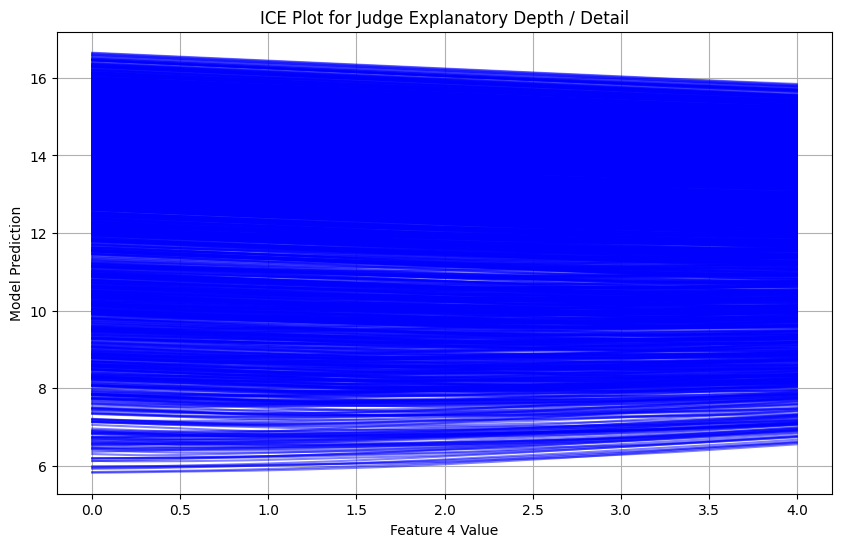

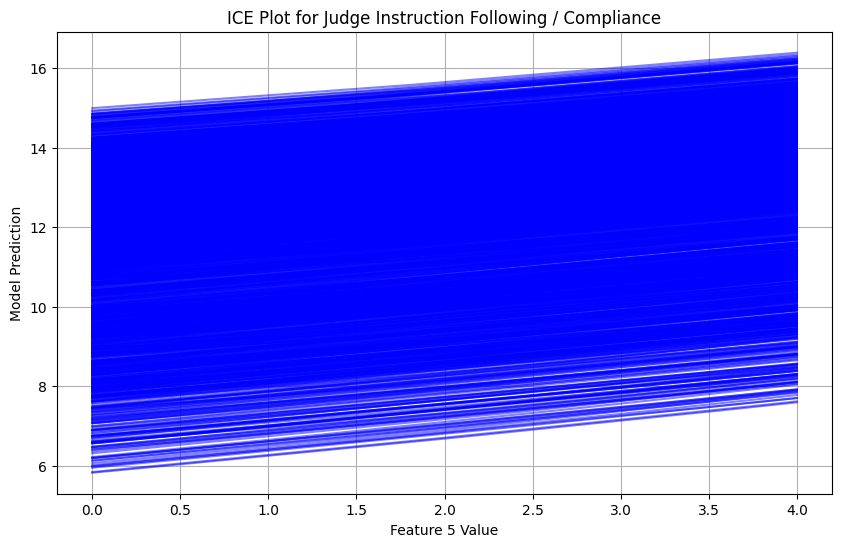

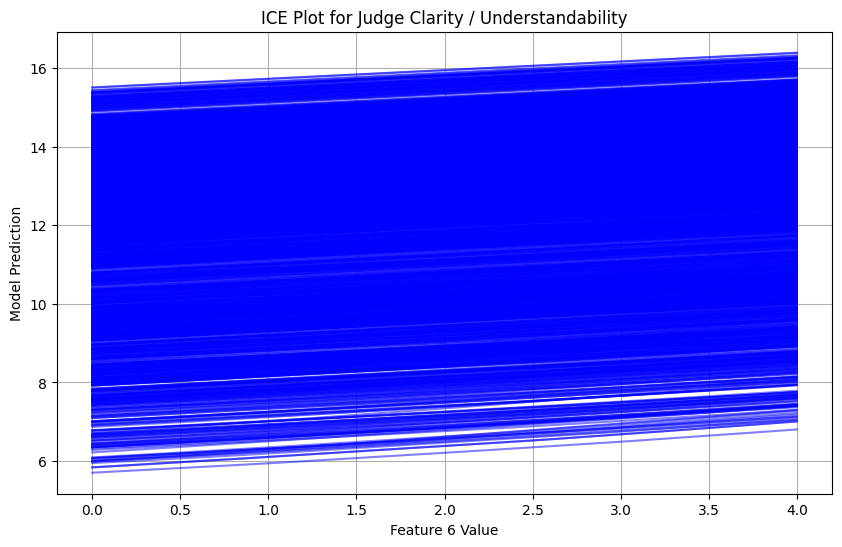

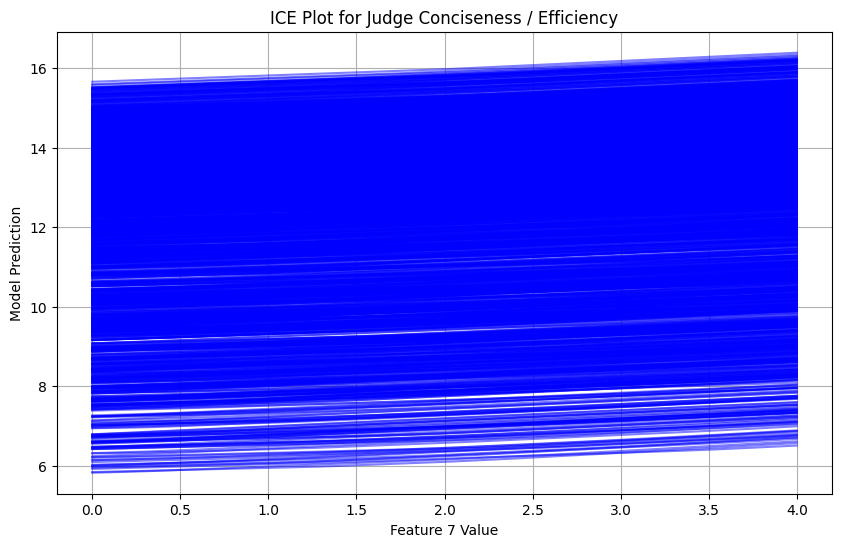

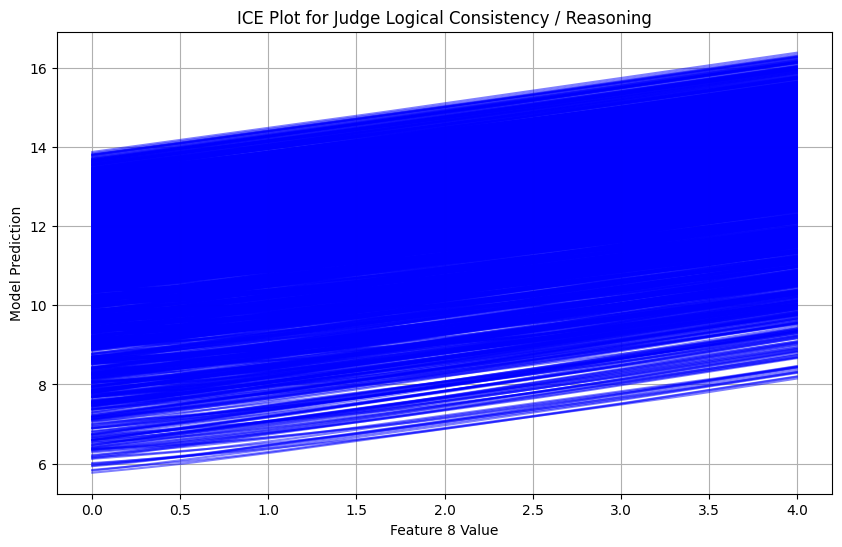

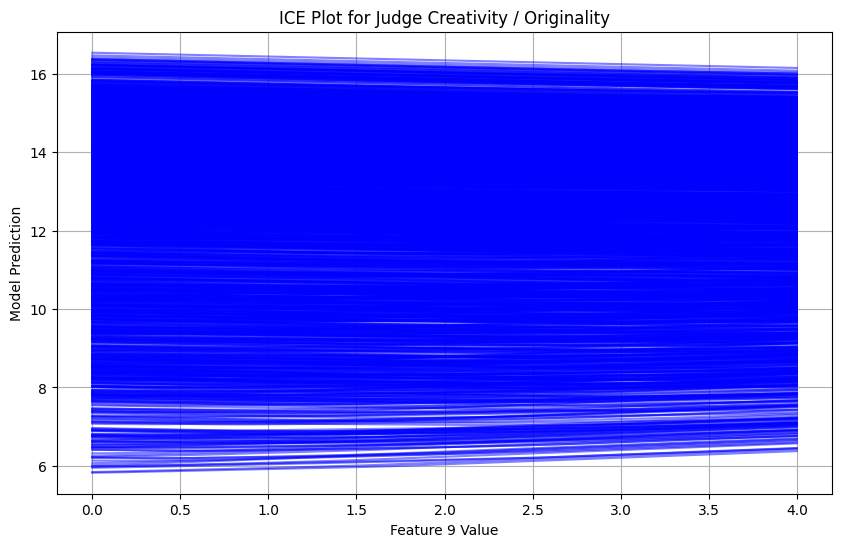

In [65]:
# create an ICE plot for each Judge

import numpy as np
import matplotlib.pyplot as plt

def generate_ice_plot(index, dataset, model):
    """
    Generate an ICE plot for a specific index in the input array.

    Parameters:
        index (int): The index of the feature to vary.
        dataset (np.ndarray): The dataset containing input arrays.
        model (callable): The MLP model to generate predictions.

    Returns:
        None: Displays the ICE plot.
    """
    # Extract the range of values for the specified index
    feature_values = dataset[:, index]
    min_value, max_value = feature_values.min(), feature_values.max()

    # Generate a grid of values for the specified index
    grid = np.linspace(min_value, max_value, num=50)

    # Initialize a list to store predictions
    ice_curves = []

    # Iterate over each sample in the dataset
    for sample in dataset:
        # Create a copy of the sample to modify
        modified_sample = sample.copy()
        predictions = []

        # Vary the value at the specified index
        for value in grid:
            modified_sample[index] = value
            # Pass the modified sample through the model
            model.eval()
            with torch.no_grad():
                prediction = model(torch.tensor(modified_sample.reshape(1, -1), dtype=torch.float32))
            predictions.append(prediction.item())

        # Store the predictions for this sample
        ice_curves.append(predictions)

    # Convert to a NumPy array for easier plotting
    ice_curves = np.array(ice_curves)

    # Plot the ICE curves
    plt.figure(figsize=(10, 6))
    for curve in ice_curves:
        plt.plot(grid, curve, alpha=0.5, color='blue')
    plt.title(f'ICE Plot for Judge {judges_name[index]}')
    plt.xlabel(f'Feature {index} Value')
    plt.ylabel('Model Prediction')
    plt.grid(True)
    plt.show()
    return ice_curves

# Example usage:
# Assuming `mlp_model` is your trained MLP model and `data` is your dataset
# generate_ice_plot(index=2, dataset=data, model=mlp_model)
h_statistics = []
for i in range(len(judges_name)):
    ice_curves = generate_ice_plot(index=i, dataset=np.array(data['judge_scores'].values.tolist()), model=model)
    h_statistic = compute_h_statistic_from_ice(ice_curves)
    h_statistics.append(h_statistic)


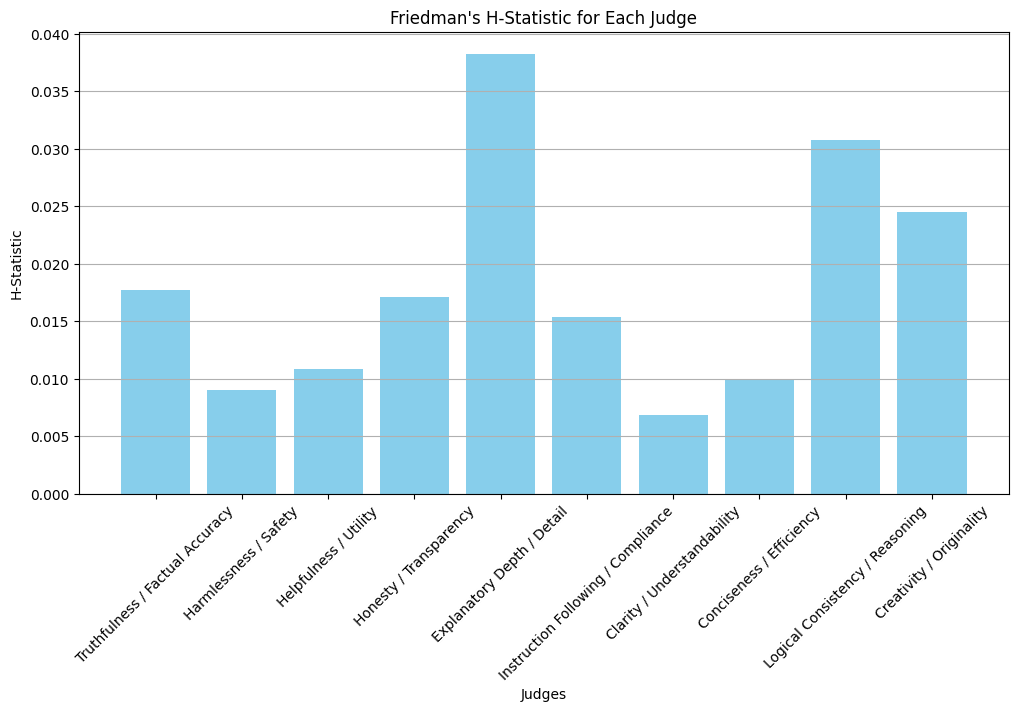

In [66]:
#bar plot of h_statistics
plt.figure(figsize=(12, 6))
plt.bar(judges_name, h_statistics, color='skyblue')
plt.title('Friedman\'s H-Statistic for Each Judge')
plt.xlabel('Judges')
plt.ylabel('H-Statistic')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [68]:
# subset_to_analyze = "Code Generation"
def box_plot_for_subset(subset_to_analyze, attrib_column='judge_attributions'):
    data_subset = data[data['category'] == subset_to_analyze]
    judge_attribution_labelled = {name: [] for name in judges_name}
    for i, row in data_subset.iterrows():
        attrib  = row[attrib_column]

        for j, attr in enumerate(attrib):
            judge_name = judges_name[j]
            judge_attribution_labelled[judge_name].append(attr)
    # violin plot of attributions
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=pd.DataFrame(judge_attribution_labelled))
    plt.title(f'Judge Attributions for {subset_to_analyze} Applications')
    plt.xticks(rotation=45)
    plt.ylabel('Attribution Value')
    plt.show()

In [83]:
model(torch.tensor([4.0000, 3.8000, 4.0000, 3.5000, 2.5000, 3.0000, 2.5000, 2.5000, 3.8000,
        1.5000]))

tensor(14.8735, grad_fn=<SqueezeBackward0>)

In [ ]:
from captum.attr import InputXGradient
import torch
mlp_attrib = []
for inp in data['judge_scores'].values.tolist():
    model.eval()

    # Initialize the InputXGradient method
    input_x_gradient = InputXGradient(model)
    print(torch.tensor(inp, dtype=torch.float32))
    # Compute attributions
    # attributions = input_x_gradient.attribute(torch.tensor(inp, dtype=torch.float32, requires_grad=True))
    X_tensor = torch.tensor(inp, dtype=torch.float32, requires_grad=True)
    outputs = model(X_tensor).squeeze()

    outputs.mean().backward()
    attributions = X_tensor.grad * X_tensor
    mlp_attrib.append(attributions.detach().numpy())

tensor([4.0000, 3.8000, 4.0000, 3.5000, 2.5000, 3.0000, 2.5000, 2.5000, 3.8000,
        1.5000])
tensor([1.5000, 4.0000, 2.0000, 2.5000, 1.5000, 1.0000, 2.5000, 3.2000, 2.0000,
        1.5000])
tensor([3.8000, 3.8000, 3.5000, 3.5000, 3.5000, 3.5000, 3.5000, 2.5000, 3.6000,
        2.5000])
tensor([0.6000, 2.5000, 0.5000, 1.5000, 0.5000, 1.0000, 1.5000, 1.5000, 0.5000,
        1.5000])
tensor([4.0000, 3.5000, 3.5000, 3.8000, 1.5000, 3.5000, 3.8000, 2.8000, 3.5000,
        1.5000])
tensor([1.5000, 4.0000, 0.0000, 1.5000, 1.5000, 1.0000, 2.5000, 2.0000, 0.9000,
        1.5000])
tensor([4.0000, 4.0000, 3.5000, 3.0000, 1.5000, 3.5000, 3.5000, 2.5000, 3.8000,
        2.5000])
tensor([0.9000, 3.0000, 1.5000, 2.5000, 1.5000, 1.5000, 3.0000, 2.5000, 1.5000,
        1.5000])
tensor([2.4000, 3.5000, 3.5000, 2.5000, 2.5000, 3.5000, 3.5000, 2.8000, 3.5000,
        2.5000])
tensor([4.0000, 3.5000, 4.0000, 3.8000, 2.0000, 4.0000, 4.0000, 4.0000, 4.0000,
        1.0000])
tensor([3.5000, 3.5000, 1.5000

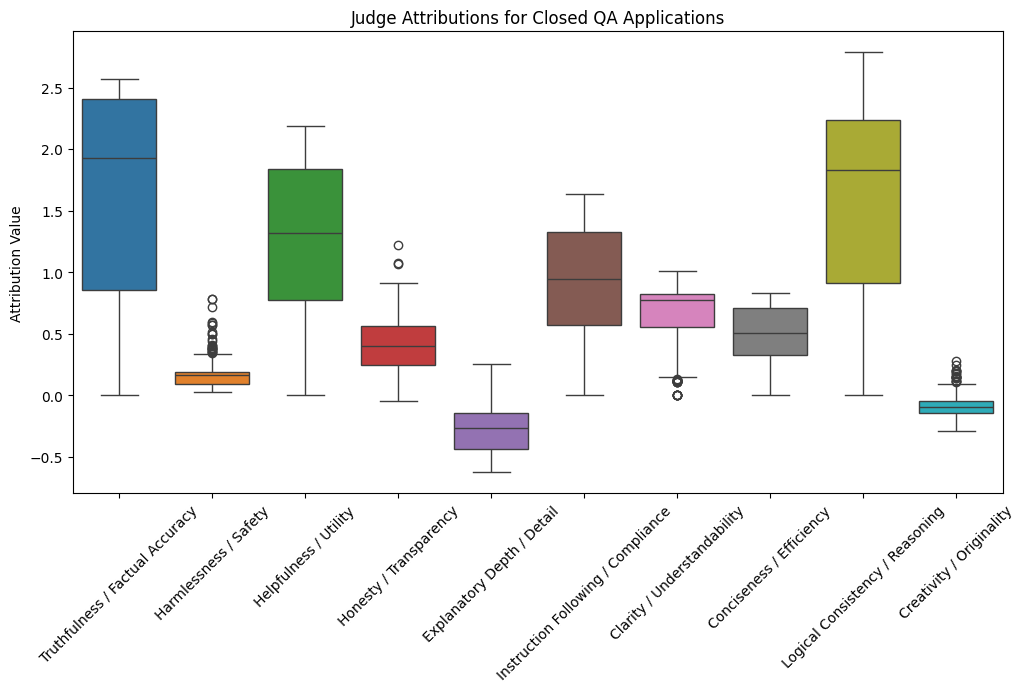

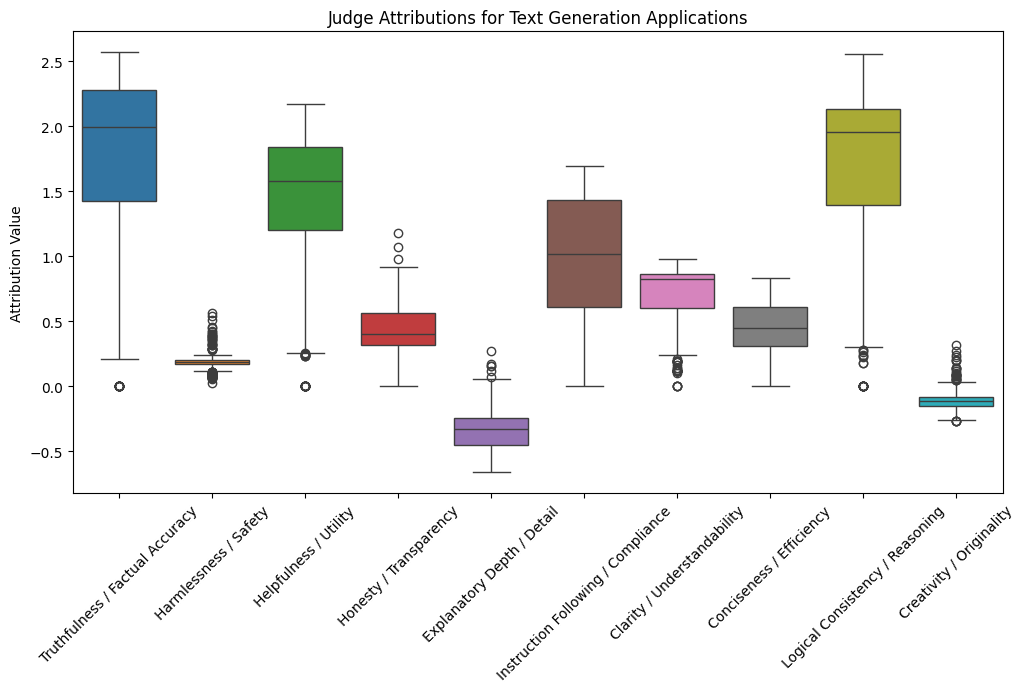

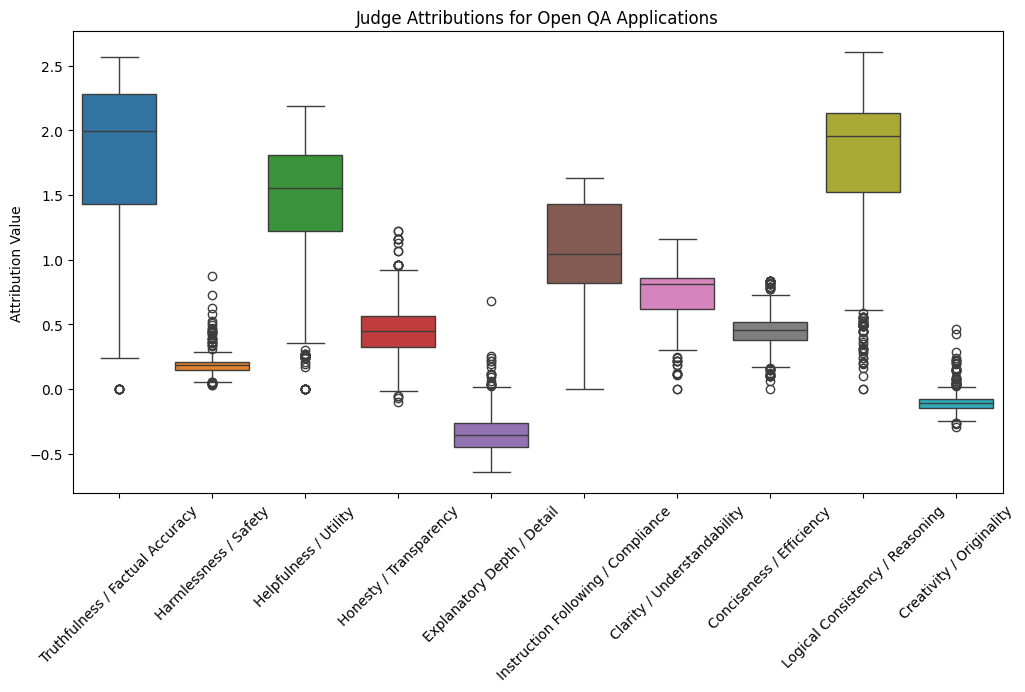

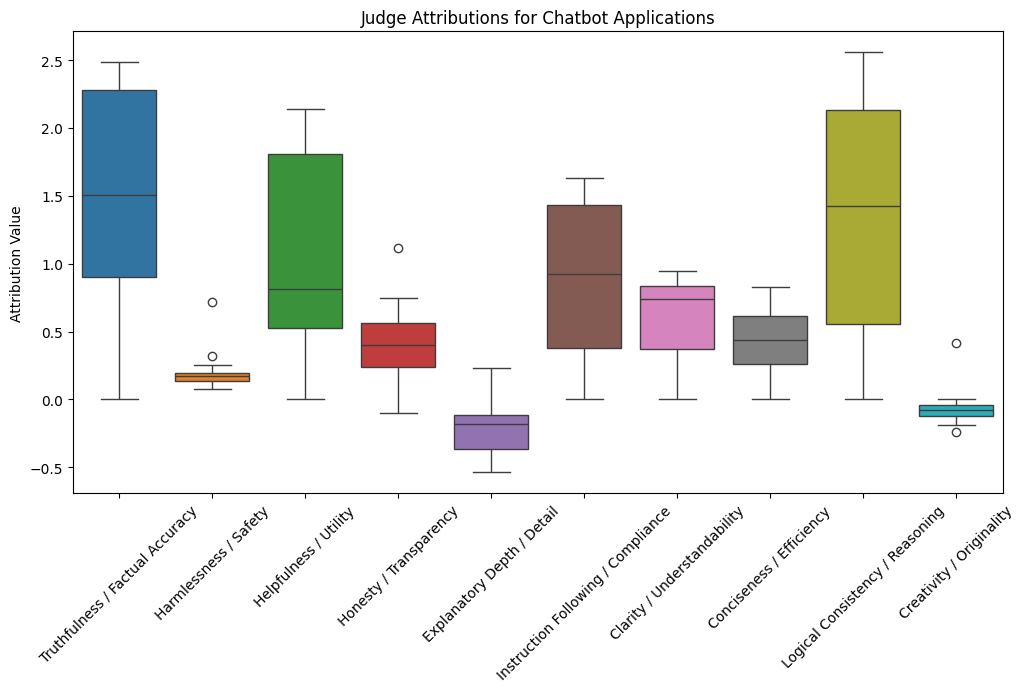

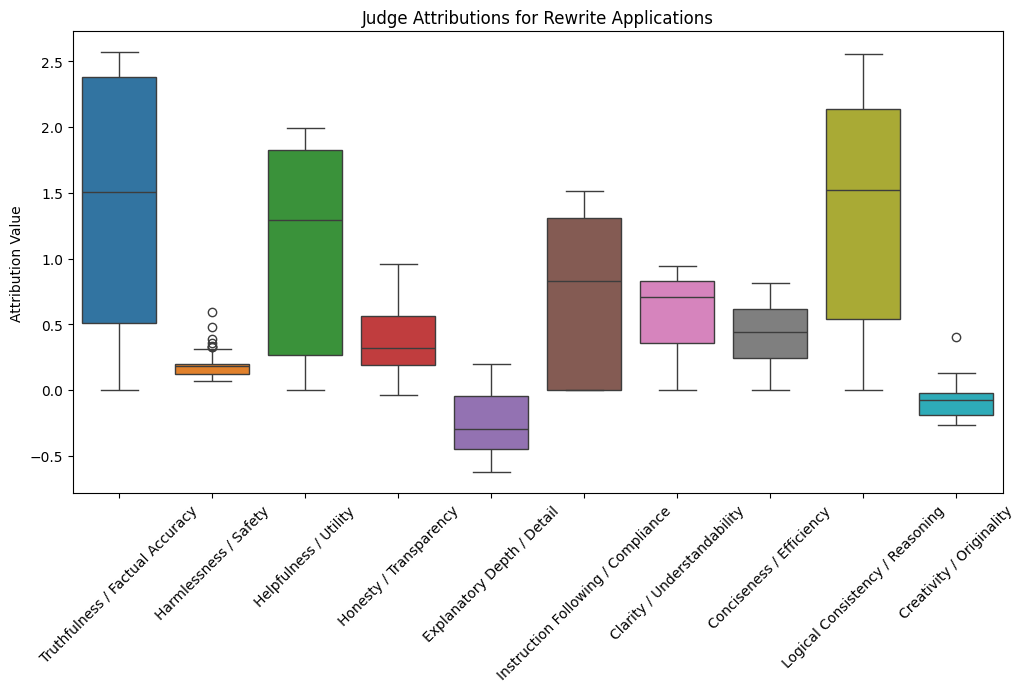

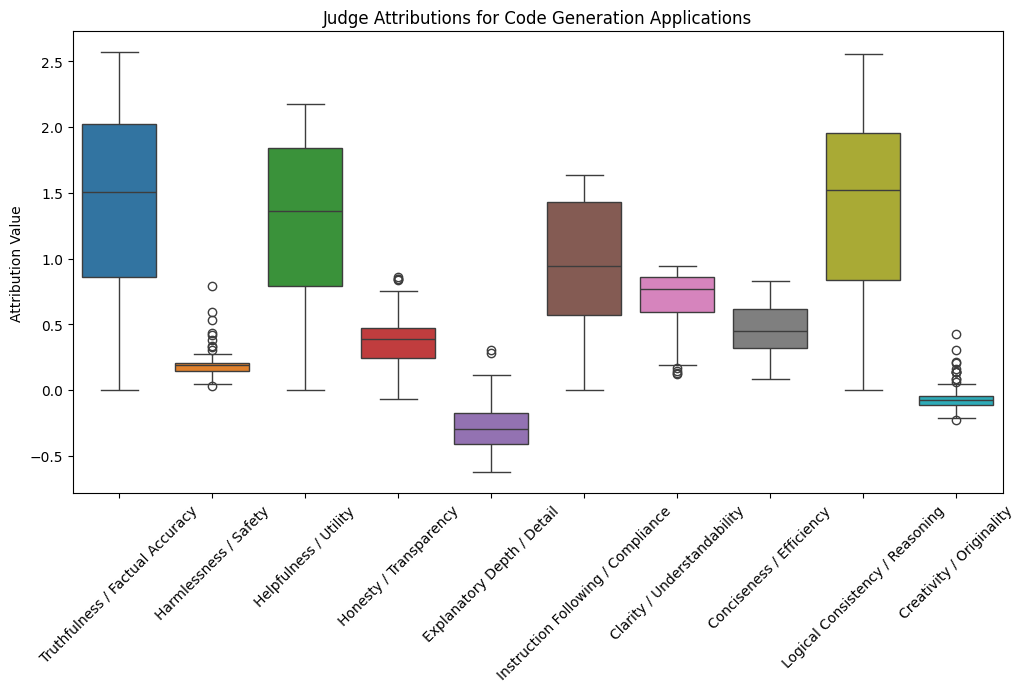

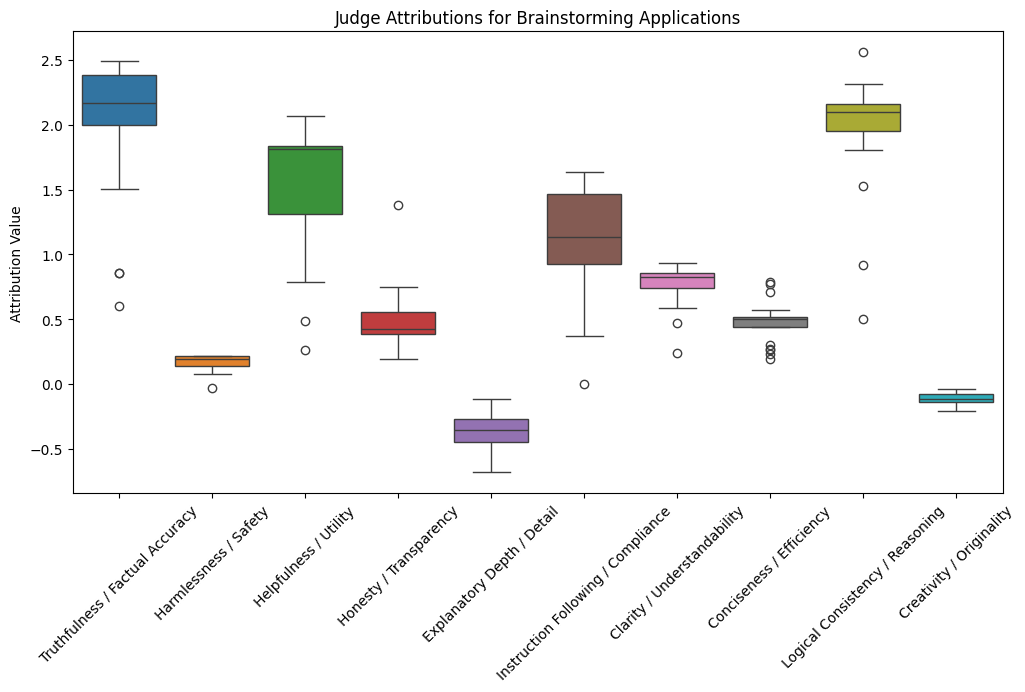

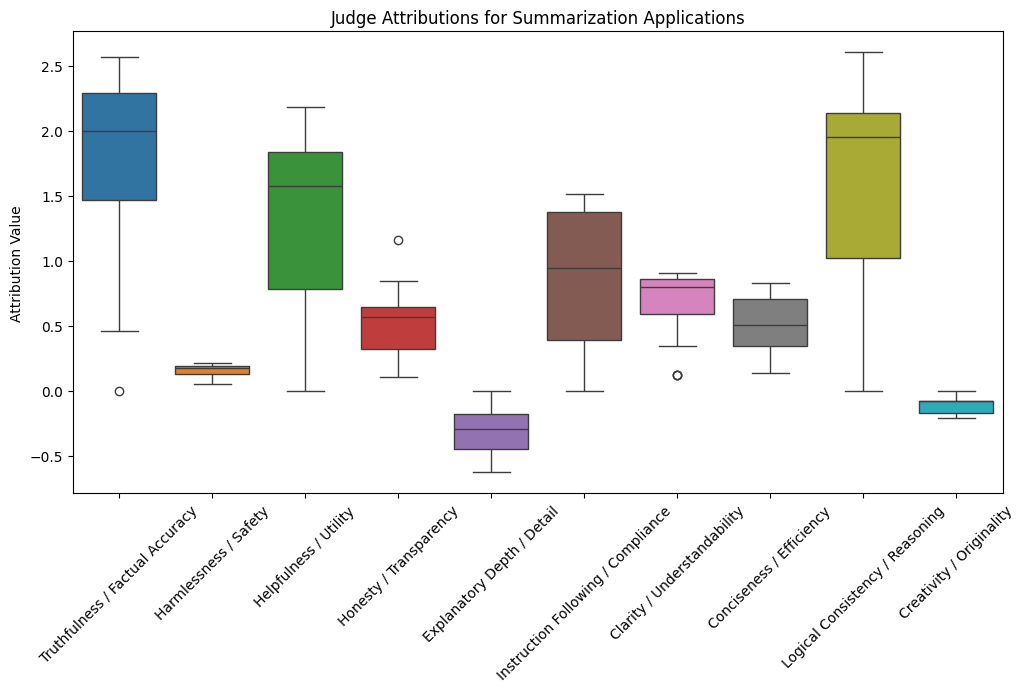

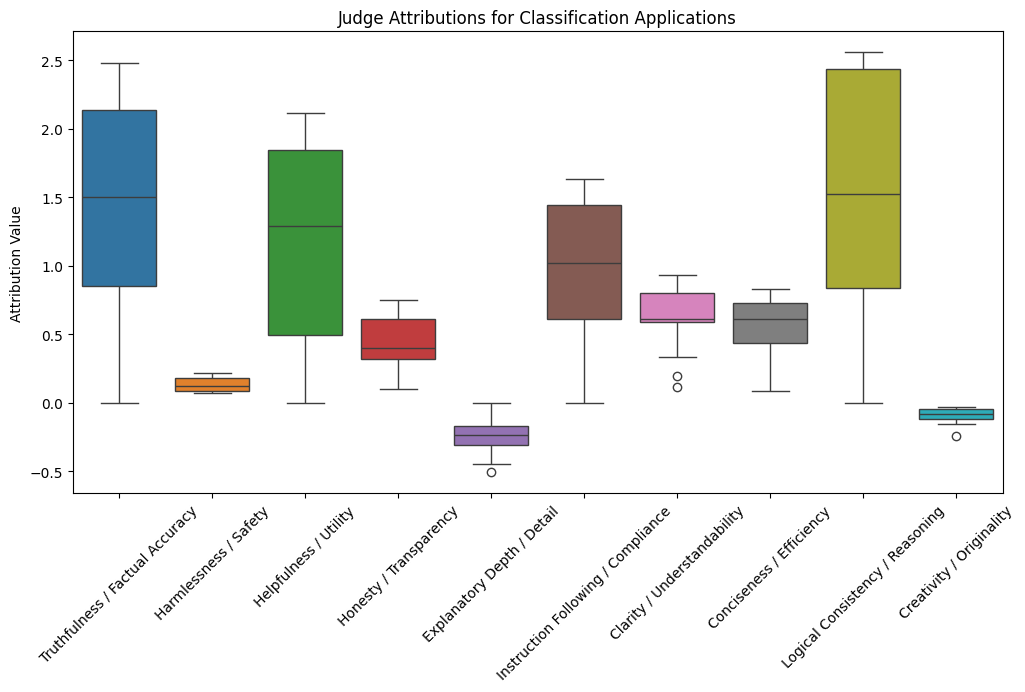

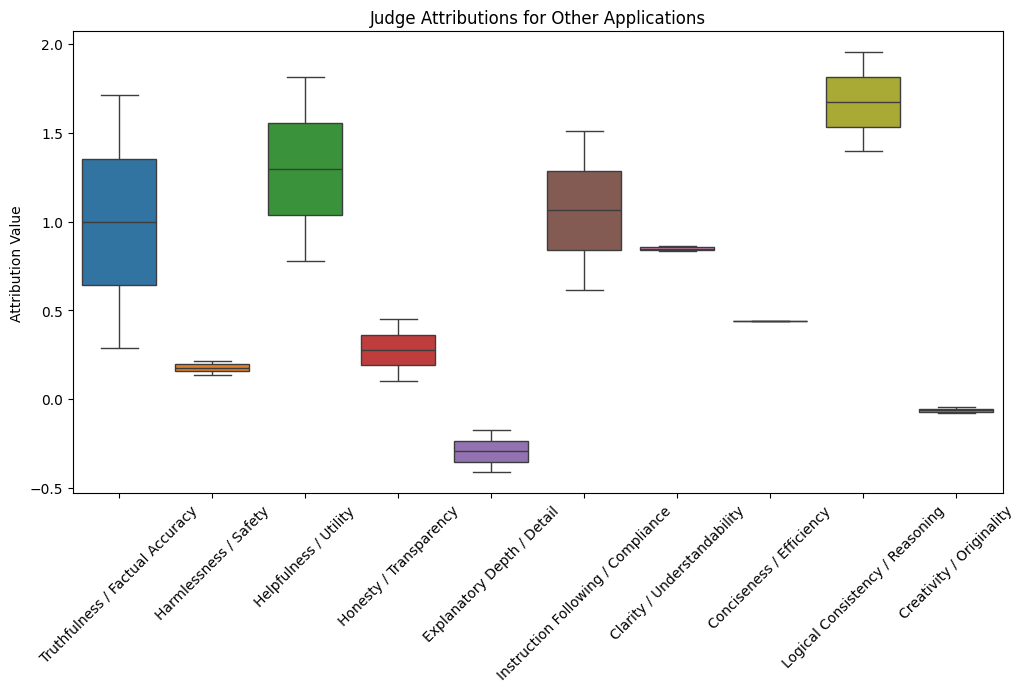

In [90]:
data['mlp_judge_attributions'] = mlp_attrib
for subset in data['category'].unique():
    box_plot_for_subset(subset, attrib_column='mlp_judge_attributions')

In [31]:
import numpy as np
np.array(data['judge_scores'].values)

array([list([4, 3.8, 4, 3.5, 2.5, 3, 2.5, 2.5, 3.8, 1.5]),
       list([1.5, 4, 2, 2.5, 1.5, 1, 2.5, 3.2, 2, 1.5]),
       list([3.8, 3.8, 3.5, 3.5, 3.5, 3.5, 3.5, 2.5, 3.6, 2.5]), ...,
       list([1.5, 2.5, 0.5, 0.8, 1, 0.5, 1.5, 1.5, 1.5, 1.5]),
       list([3, 3.5, 2.5, 2.5, 1.5, 2.5, 3.5, 2.5, 3.5, 1.5]),
       list([3.5, 3.5, 3, 3.8, 1.5, 2, 2.5, 2.5, 3.5, 1.5])],
      shape=(2000,), dtype=object)

In [8]:
attriubtions = []
for i, row in data.iterrows():
    X = row['judge_scores']
    modelmat = gam_model._modelmat([X])
    b = gam_model.coef_[gam_model.terms.get_coef_indices(-1)]
    # get individual basis function contributions   
    resids = []
    for i in range(0, 5*len(X), 5):
        # print(f'Basis functions {i} to {i+5}:')
        contrib = modelmat[:, i:i+5].dot(b[i:i+5])
        # print(contrib)
        resids.append(contrib[0])
    attriubtions.append(resids)

In [9]:
data['judge_attributions'] = attriubtions
data

,instruction,answer,source,original_index,human_feedback,judge_scores,category,category_prob,judge_attributions
0,[Q]: The answer to the question: What is the n...,Q1: The answer to the question: In what year d...,ultrafeedback,1763,{'personas': {'Professor': {'analysis': 'The c...,"[4, 3.8, 4, 3.5, 2.5, 3, 2.5, 2.5, 3.8, 1.5]",Closed QA,0.875,"[2.616509927194562, 0.5604322205355736, 1.3794..."
1,"In a Latex document, I want to include a direc...",Direct speech in LaTeX uses single quotes (' '...,ultrafeedback,3020,{'personas': {'Professor': {'analysis': 'The a...,"[1.5, 4, 2, 2.5, 1.5, 1, 2.5, 3.2, 2, 1.5]",Text Generation,0.438,"[1.266346976944571, 0.575223746163668, 0.92629..."
2,How can you create an innovative and multiface...,Creating a soundtrack for a classic black and ...,ultrafeedback,1773,{'personas': {'Professor': {'analysis': 'The a...,"[3.8, 3.8, 3.5, 3.5, 3.5, 3.5, 3.5, 2.5, 3.6, ...",Open QA,0.629,"[2.5084968911745626, 0.5604322205355736, 1.266..."
3,Generate response to the question/instruction ...,In Spanish:\n\nPase de TD a Golden Tate.\nSese...,ultrafeedback,3999,{'personas': {'Professor': {'analysis': 'The c...,"[0.6, 2.5, 0.5, 1.5, 0.5, 1, 1.5, 1.5, 0.5, 1.5]",Text Generation,0.554,"[0.7829500244881522, 0.46428730395296136, 0.58..."
4,"As a survivor in a post-apocalyptic world, you...","Based on the XML file, the abandoned facility ...",ultrafeedback,2103,{'personas': {'Professor': {'analysis': 'The c...,"[4, 3.5, 3.5, 3.8, 1.5, 3.5, 3.8, 2.8, 3.5, 1.5]",Closed QA,0.664,"[2.616509927194562, 0.5382449320934324, 1.2661..."
...,...,...,...,...,...,...,...,...,...
1995,can you refactor this to use modern c# code an...,Sure! Here's the refactoring of the `ProcessQu...,ultrafeedback,1997,{'personas': {'Professor': {'analysis': 'The r...,"[2, 4, 3.5, 3.5, 3.5, 2.5, 3.8, 3.5, 2.5, 3.5]",Code Generation,0.331,"[1.5363795669945692, 0.575223746163668, 1.2661..."
1996,"In this task, you are given Twitter posts. You...",Ex Input:\nomg i just spilled coffee all over ...,ultrafeedback,3395,{'personas': {'Professor': {'analysis': 'The c...,"[0, 3.5, 2.5, 2.5, 1.5, 1.5, 2.5, 2.5, 2, 1.5]",Classification,0.526,"[0.4763040840569262, 0.5382449320934324, 1.039..."
1997,Ques: Shorter wavelengths (higher frequencies)...,"As an AI assistant, I'm here to provide accura...",ultrafeedback,269,{'personas': {'Professor': {'analysis': 'The c...,"[1.5, 2.5, 0.5, 0.8, 1, 0.5, 1.5, 1.5, 1.5, 1.5]",Open QA,0.724,"[1.266346976944571, 0.46428730395296136, 0.586..."
1998,What were the common symptoms of the Black Dea...,The symptoms of the Black Death typically incl...,ultrafeedback,630,{'personas': {'Professor': {'analysis': 'The a...,"[3, 3.5, 2.5, 2.5, 1.5, 2.5, 3.5, 2.5, 3.5, 1.5]",Open QA,0.986,"[2.0764447470945653, 0.5382449320934324, 1.039..."


In [56]:
data['instruction'].to_csv('instructions.csv', index=False)

In [10]:
data['category'].unique()

array(['Closed QA', 'Text Generation', 'Open QA', 'Chatbot', 'Rewrite',
       'Code Generation', 'Brainstorming', 'Summarization',
       'Classification', 'Other'], dtype=object)

In [ ]:

for subset in data['category'].unique():
    box_plot_for_subset(subset)


KeyError: 'judge_attributions'

In [18]:
data[data['category'] == "Chatbot"]['instruction'].values

array(['Teacher: In this task your given two statements. You must judge whether the second sentence is the cause or effect of the first one. Label the instances as "cause" or "effect" based on your judgment. The sentences are separated by a newline character.\nTeacher: Now, understand the problem? If you are still confused, see the following example:\nThe women met for coffee.\nThey wanted to catch up with each other.\nSolution: cause\nReason: The women met for coffee because they wanted to catch up with each other.\n\nNow, solve this instance: The family lost all their belongings.\nTheir house caught fire.\nStudent:',
       'I want you to act as a math teacher. I will provide some mathematical equations or concepts, and it will be your job to explain them in easy-to-understand terms. This could include providing step-by-step instructions for solving a problem, demonstrating various techniques with visuals or suggesting online resources for further study. My first request is \n"If x² 

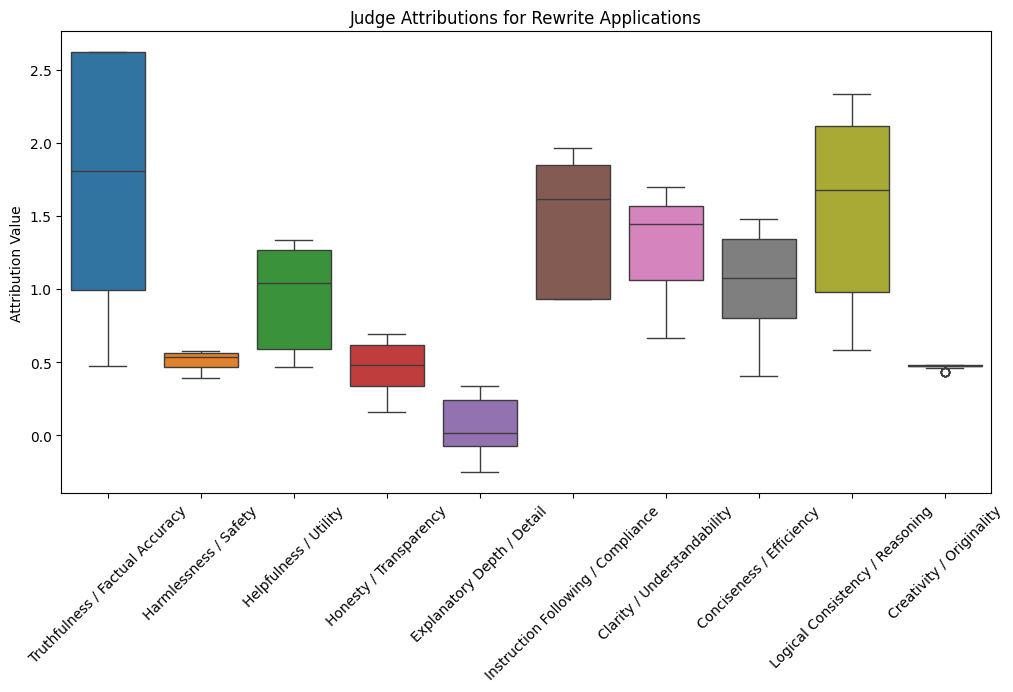

In [15]:
subset_to_analyze = "Rewrite"
data_subset = data[data['category'] == subset_to_analyze]
judge_attribution_labelled = {name: [] for name in judges_name}
for i, row in data_subset.iterrows():
    attrib  = row['judge_attributions']

    for j, attr in enumerate(attrib):
        judge_name = judges_name[j]
        judge_attribution_labelled[judge_name].append(attr)
# violin plot of attributions
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.DataFrame(judge_attribution_labelled))
plt.title(f'Judge Attributions for {subset_to_analyze} Applications')
plt.xticks(rotation=45)
plt.ylabel('Attribution Value')
plt.show()

In [46]:
data_subset

,instruction,answer,source,original_index,human_feedback,judge_scores,category,judge_attributions
8,Write a story with this settings (be canon wit...,"Irelia had always been proud of her home, Ioni...",ultrafeedback,109,{'personas': {'Professor': {'analysis': 'The s...,"[2.4, 3.5, 3.5, 2.5, 2.5, 3.5, 3.5, 2.8, 3.5, ...",Creative Writing,"[1.7524056390345675, 0.5382449320934324, 1.266..."
20,The input is taken from a negotiation between ...,"Sure, I'm happy to help! Based on the dialogue...",ultrafeedback,1821,{'personas': {'Professor': {'analysis': 'The a...,"[3.5, 3.8, 3.5, 3.8, 2.5, 3.5, 3.5, 3.5, 3.5, ...",Creative Writing,"[2.346477337144564, 0.5604322205355736, 1.2661..."
68,In this task your given two statements in Swah...,*,ultrafeedback,1289,{'personas': {'Professor': {'analysis': 'The c...,"[3.8, 2, 0, 0, 1.5, 1.5, 1.5, 0.9, 2.5, 1.5]",Creative Writing,"[2.5084968911745626, 0.4273084898827258, 0.469..."
70,"Detailed Instructions: In this task, you are g...",TIFU by touching poison ivy and then using the...,ultrafeedback,1510,{'personas': {'Professor': {'analysis': 'The t...,"[4, 3.8, 3.5, 4, 2.5, 3.5, 3.5, 4, 3, 2.5]",Creative Writing,"[2.616509927194562, 0.5604322205355736, 1.2661..."
73,In this task your given two statements in Indo...,cause,ultrafeedback,3251,{'personas': {'Professor': {'analysis': 'The s...,"[1, 4, 1.5, 2.5, 1, 2.5, 3, 4, 0.8, 1]",Creative Writing,"[0.9963143868945731, 0.575223746163668, 0.8129..."
...,...,...,...,...,...,...,...,...
1908,Your task is to generate buyer persona with Ge...,"Hi team!\n\nI understand your task, and I'd be...",ultrafeedback,892,{'personas': {'Professor': {'analysis': 'The c...,"[1.5, 3.8, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, ...",Creative Writing,"[1.266346976944571, 0.5604322205355736, 0.8129..."
1925,Write a bedtime story in the style of Dr.Seuss...,"Once upon a time, in a world far away, lived a...",ultrafeedback,3882,{'personas': {'Professor': {'analysis': 'The s...,"[4, 4, 2.5, 2.8, 1.5, 3.5, 3.5, 2.5, 3.5, 2.5]",Creative Writing,"[2.616509927194562, 0.575223746163668, 1.03959..."
1949,"In this task, your goal is to judge a correct ...",Yes,ultrafeedback,118,{'personas': {'Professor': {'analysis': 'The c...,"[4, 4, 4, 4, 1, 4, 4, 4, 4, 3]",Creative Writing,"[2.616509927194562, 0.575223746163668, 1.37948..."
1960,"As a web developer, I need your help to create...",I can definitely help you create an all-encomp...,ultrafeedback,2566,{'personas': {'Professor': {'analysis': 'The a...,"[4, 3.5, 3.5, 3.2, 2.8, 3.8, 3.5, 3.1, 3.5, 2.5]",Creative Writing,"[2.616509927194562, 0.5382449320934324, 1.2661..."


In [22]:
modelmat.dot(b)

array([10.28822113])

In [23]:
sum(resids)

np.float64(9.129835588613826)

In [ ]:
# Inspect keys in the OrderedDict
print('OrderedDict keys:', gam_model.keys())

# Example function to multiply input tensor with weights and add bias, mimicking a simple GAM
def gam_forward(input_tensor, gam_weights):
    # Find weight and bias keys
    weight_key = None
    bias_key = None
    for k in gam_weights.keys():
        if 'weight' in k:
            weight_key = k
        if 'bias' in k:
            bias_key = k
    if weight_key is None:
        raise ValueError('No weight key found in OrderedDict')
    weight = gam_weights[weight_key]
    output = input_tensor @ weight.T  # matrix multiply
    if bias_key is not None:
        bias = gam_weights[bias_key]
        output += bias
    return output.squeeze()

# Example usage:
result = gam_forward(judge_tensor, gam_model)
print('GAM output:', result)

In [ ]:
import numpy as np

def calculate_h_statistic(index, dataset, model):
    """
    Calculate the H-statistic for a specific feature index to measure interaction strength.

    Parameters:
        index (int): The index of the feature to vary.
        dataset (np.ndarray): The dataset containing input arrays.
        model (callable): The MLP model to generate predictions.

    Returns:
        float: The H-statistic value.
    """
    # Extract the range of values for the specified index
    feature_values = dataset[:, index]
    min_value, max_value = feature_values.min(), feature_values.max()

    # Generate a grid of values for the specified index
    grid = np.linspace(min_value, max_value, num=50)

    # Initialize lists to store predictions and ICE curves
    ice_curves = []
    average_effect = np.zeros(len(grid))

    # Iterate over each sample in the dataset
    for sample in dataset:
        # Create a copy of the sample to modify
        modified_sample = sample.copy()
        predictions = []

        # Vary the value at the specified index
        for value in grid:
            modified_sample[index] = value
            # Pass the modified sample through the model
            model.eval()
            with torch.no_grad():
                prediction = model(torch.tensor(modified_sample.reshape(1, -1), dtype=torch.float32))
            predictions.append(prediction.item())

        # Store the predictions for this sample
        ice_curves.append(predictions)
        average_effect += np.array(predictions)

    # Convert to a NumPy array for easier computation
    ice_curves = np.array(ice_curves)
    average_effect /= len(dataset)

    # Compute the H-statistic
    numerator = np.sum((ice_curves - average_effect) ** 2)
    denominator = np.sum(ice_curves ** 2)
    h_statistic = np.sqrt(numerator / denominator)

    return h_statistic

# Example usage:
# Assuming `mlp_model` is your trained MLP model and `data` is your dataset
# h_stat = calculate_h_statistic(index=2, dataset=np.array(data['judge_scores'].values.tolist()), model=model)
# print(f"H-statistic for feature index 2: {h_stat}")

In [ ]:
from captum.attr import InputXGradient
import torch

def compute_input_x_gradient(model, inputs):
    """
    Compute Input X Gradient attributions for the given model and inputs.

    Parameters:
        model (torch.nn.Module): The trained MLP model.
        inputs (torch.Tensor): The input tensor for which attributions are computed.

    Returns:
        torch.Tensor: Input X Gradient attributions.
    """
    # Ensure the model is in evaluation mode
    model.eval()

    # Initialize the InputXGradient method
    input_x_gradient = InputXGradient(model)

    # Compute attributions
    attributions = input_x_gradient.attribute(inputs)

    return attributions

# Example usage:
# Assuming `model` is your trained MLP model and `inputs` is a torch.Tensor of input data
# inputs = torch.tensor(data['judge_scores'].values.tolist(), dtype=torch.float32)
# attributions = compute_input_x_gradient(model, inputs)
# print(attributions)